In [1]:
import os
import cv2

import numpy as np
import seaborn as sns
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [2]:
def load_images_from_folder(folder):
    i=0
    images = []
    for filename in os.listdir(folder):
        img_array = cv2.imread(os.path.join(folder,filename))
        img_array=np.array(img_array)
        if img_array is not None:
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_array = cv2.resize(img_array, (256, 256))
            images.append(new_array)
    return images

In [3]:
images1=load_images_from_folder('Datasets/Train/Albatross_train')
images2=load_images_from_folder('Datasets/Train/American_Goldfinch_train')
images3=load_images_from_folder('Datasets/Train/anthuriam_train')
images4=load_images_from_folder('Datasets/Train/frangipani_train')
images5=load_images_from_folder('Datasets/Train/Marigold_train')
images6=load_images_from_folder('Datasets/Train/Red_headed_Woodpecker_train')

images11=load_images_from_folder('Datasets/test/Albatross_test')
images22=load_images_from_folder('Datasets/test/American_Goldfinch_test')
images33=load_images_from_folder('Datasets/test/anthuriam_test')
images44=load_images_from_folder('Datasets/test/frangipani_test')
images55=load_images_from_folder('Datasets/test/Marigold_test')
images66=load_images_from_folder('Datasets/test/Red_headed_Woodpecker_test')

In [9]:
images1=np.array(images1)
images2=np.array(images2)
images3=np.array(images3)
images4=np.array(images4)
images5=np.array(images5)
images6=np.array(images6)
images11=np.array(images11)
images22=np.array(images22)
images33=np.array(images33)
images44=np.array(images44)

images55=np.array(images55)
images66=np.array(images66)

In [4]:
DATADIR = 'Datasets/Train'
CATEGORIES=['Albatross_train','American_Goldfinch_train','anthuriam_train','frangipani_train','Marigold_train','Red_headed_Woodpecker_train']
Xtrain = []
ytrain = []
for category in CATEGORIES:

    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)

    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_array, (256, 256))
        Xtrain.append(new_array)
        ytrain.append(class_num)

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 229.07it/s]


In [5]:
DATADIR = 'Datasets/Test'
CATEGORIES=['Albatross_test','American_Goldfinch_test','anthuriam_test','frangipani_test','Marigold_test','Red_headed_Woodpecker_test']
Xtest = []
ytest = []
for category in CATEGORIES:

    path = os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)

    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_array, (256, 256))
        Xtest.append(new_array)
        ytest.append(class_num)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 253.96it/s]


In [6]:
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)
Xtrain.shape, ytrain.shape

((240, 256, 256, 3), (240,))

In [7]:
Xtest = np.array(Xtest)
ytest = np.array(ytest)
Xtest.shape, ytest.shape

((120, 256, 256, 3), (120,))

In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            validation_split=0.2
)

In [9]:
regularizer = tf.keras.regularizers.l2(l=0)
regularizer_1 = tf.keras.regularizers.l2(l=0.001)
init = tf.initializers.glorot_uniform()
model = tf.keras.models.Sequential([
                                    
        tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), strides = (1, 1), padding='same', activation='relu', kernel_initializer=init, kernel_regularizer=regularizer, input_shape=(256, 256, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
        
        
        
        #tf.keras.layers.Conv2D(160, (3, 3), (1, 1), padding='same', activation='relu', kernel_initializer=init, kernel_regularizer=regularizer),
        #tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.MaxPooling2D((2, 2), (2, 2)),
        #tf.keras.layers.SpatialDropout2D(0.2),

        
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, activation = 'relu', kernel_initializer=init, kernel_regularizer= regularizer),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(6, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               33554560  
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

# Using Adam

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(Xtrain, ytrain, epochs=10, validation_data=(Xtest,ytest), shuffle=True)

Epoch 1/10
8/8 [==============================] - 8s 996ms/step - loss: 7.6682e-04 - accuracy: 1.0000 - val_loss: 0.4614 - val_accuracy: 0.8500
Epoch 2/10
8/8 [==============================] - 7s 912ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4616 - val_accuracy: 0.8583
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.4607 - val_accuracy: 0.8583
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4606 - val_accuracy: 0.8583
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.0051 - accuracy: 0.9958 - val_loss: 0.4608 - val_accuracy: 0.8583
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4611 - val_accuracy: 0.8583
Epoch 7/10
8/8 [==============================] - 7s 919ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4617 - val_accuracy: 0.8583
Epoch 8/10
8/8 [============

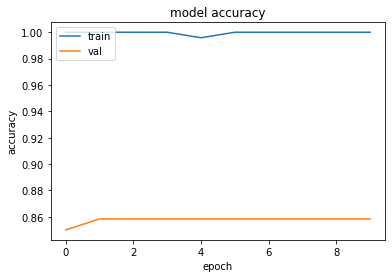

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Using RMSPROP

Epoch 1/10
8/8 [==============================] - 9s 1s/step - loss: 0.0191 - accuracy: 0.9917 - val_loss: 0.7584 - val_accuracy: 0.7833
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.0156 - accuracy: 0.9958 - val_loss: 0.6329 - val_accuracy: 0.8000
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.5204 - val_accuracy: 0.8083
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.0112 - accuracy: 0.9958 - val_loss: 0.5105 - val_accuracy: 0.8167
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.4955 - val_accuracy: 0.8417
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.4814 - val_accuracy: 0.8417
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.4785 - val_accuracy: 0.8667
Epoch 8/10
8/8 [======================

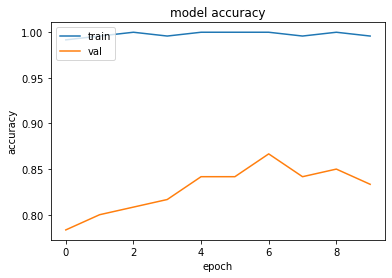

In [16]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=10, validation_data=(Xtest,ytest), shuffle=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Using Adagrad

Epoch 1/10
8/8 [==============================] - 8s 939ms/step - loss: 0.0045 - accuracy: 0.9958 - val_loss: 0.4635 - val_accuracy: 0.8417
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4630 - val_accuracy: 0.8417
Epoch 3/10
8/8 [==============================] - 7s 913ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4616 - val_accuracy: 0.8500
Epoch 4/10
8/8 [==============================] - 7s 910ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4612 - val_accuracy: 0.8500
Epoch 5/10
8/8 [==============================] - 7s 915ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4613 - val_accuracy: 0.8500
Epoch 6/10
8/8 [==============================] - 7s 901ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4616 - val_accuracy: 0.8500
Epoch 7/10
8/8 [==============================] - 7s 875ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4621 - val_accuracy: 0.8500
Epoch 8/10
8/8 [=======

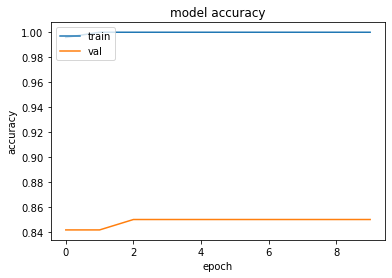

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=10, validation_data=(Xtest,ytest), shuffle=True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()